<a href="https://colab.research.google.com/github/handsomekiwi/JupyterPractice/blob/master/ML_course_HW/Y2019%20HW10_2u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D,BatchNormalization
import os 
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

In [0]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

In [0]:
np.random.seed(50)

In [0]:
from keras.datasets import cifar100
#Cifra-100 有50000筆training data 10000筆testing data 32*32的彩色圖片 共100類
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar100.load_data(label_mode='fine')


In [0]:
# normalize and onehot
x_train_normalize=x_train_image.astype('float32')/255.0
x_test_normalize=x_test_image.astype('float32')/255.0  


y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)

In [15]:
#create model
model=Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3)))
                
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same', 
                 input_shape=(16,16,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 padding='same' 
                 ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(4096))

model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(100,activation='softmax'))

model.summary()  
print("") 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)       

In [0]:
from sklearn.model_selection import train_test_split
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(x_train_normalize,y_train_onehot, test_size = 0.1, random_state=10)

Epoch 1/100
 - 29s - loss: 1.7146 - acc: 0.5194 - val_loss: 2.3302 - val_acc: 0.4264

Epoch 00001: val_acc improved from -inf to 0.42640, saving model to cifar_weights.h5
Epoch 2/100
 - 28s - loss: 1.6691 - acc: 0.5309 - val_loss: 3.5307 - val_acc: 0.2916

Epoch 00002: val_acc did not improve from 0.42640
Epoch 3/100
 - 27s - loss: 1.6472 - acc: 0.5355 - val_loss: 2.1869 - val_acc: 0.4558

Epoch 00003: val_acc improved from 0.42640 to 0.45580, saving model to cifar_weights.h5
Epoch 4/100
 - 28s - loss: 1.6002 - acc: 0.5458 - val_loss: 2.4090 - val_acc: 0.4160

Epoch 00004: val_acc did not improve from 0.45580
Epoch 5/100
 - 28s - loss: 1.5722 - acc: 0.5534 - val_loss: 2.2325 - val_acc: 0.4504

Epoch 00005: val_acc did not improve from 0.45580
Epoch 6/100
 - 29s - loss: 1.5146 - acc: 0.5684 - val_loss: 3.0454 - val_acc: 0.3406

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.

Epoch 00006: val_acc did not improve from 0.45580
Epoch 7/100
 - 28s - loss: 1.3

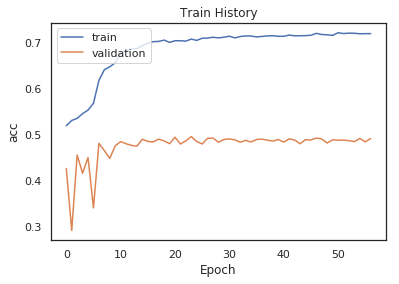

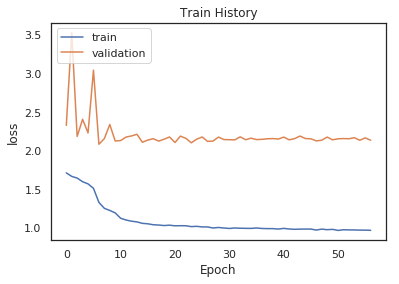

10000/10000 [==============================] - 2s 187us/step

	[Info] Accuracy of testing data = 48.2%


In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# With data augmentation to prevent overfitting
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 100 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 200

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.3, min_lr = 0.00001)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 50, verbose = 1, restore_best_weights = True)
checkpoint = ModelCheckpoint('cifar_weights.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
callbacks = [reduce_learning_rate,early_stopping,checkpoint]
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
datagen.fit(X_train)

# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks= callbacks)

#train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)
show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 


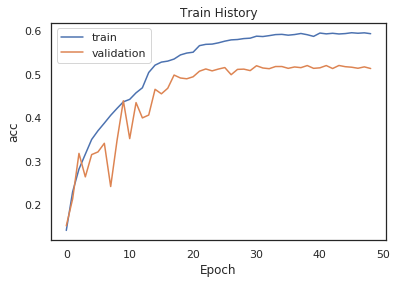

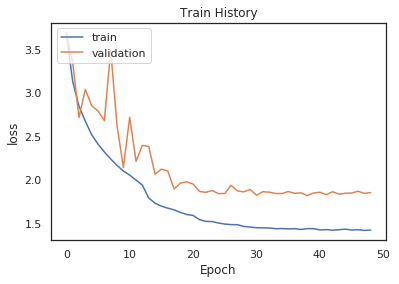

10000/10000 [==============================] - 2s 173us/step

	[Info] Accuracy of testing data = 52.8%


In [13]:
show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 


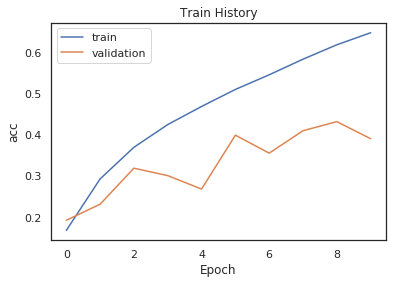

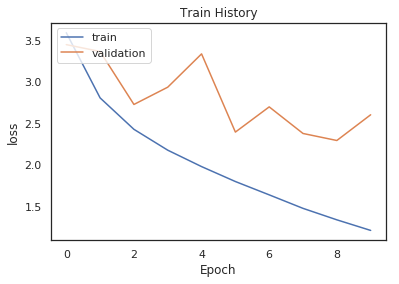

10000/10000 [==============================] - 1s 149us/step

	[Info] Accuracy of testing data = 33.8%


In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# With data augmentation to prevent overfitting
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 100 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 248

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.3, min_lr = 0.00001)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 50, verbose = 1, restore_best_weights = True)
checkpoint = ModelCheckpoint('cifar_weights.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
callbacks = [reduce_learning_rate,early_stopping,checkpoint]
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
datagen.fit(X_train)

# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks= callbacks)

#train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)
show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 


Epoch 1/100
 - 30s - loss: 1.4276 - acc: 0.5896 - val_loss: 2.6440 - val_acc: 0.4040

Epoch 00001: val_acc improved from -inf to 0.40400, saving model to cifar_weights.h5
Epoch 2/100
 - 28s - loss: 1.3756 - acc: 0.6020 - val_loss: 2.7614 - val_acc: 0.3866

Epoch 00002: val_acc did not improve from 0.40400
Epoch 3/100
 - 28s - loss: 1.3415 - acc: 0.6092 - val_loss: 2.4457 - val_acc: 0.4364

Epoch 00003: val_acc improved from 0.40400 to 0.43640, saving model to cifar_weights.h5
Epoch 4/100
 - 28s - loss: 1.3068 - acc: 0.6203 - val_loss: 2.6424 - val_acc: 0.4060

Epoch 00004: val_acc did not improve from 0.43640
Epoch 5/100
 - 27s - loss: 1.2716 - acc: 0.6257 - val_loss: 2.4759 - val_acc: 0.4268

Epoch 00005: val_acc did not improve from 0.43640
Epoch 6/100
 - 28s - loss: 1.2354 - acc: 0.6357 - val_loss: 2.3771 - val_acc: 0.4458

Epoch 00006: val_acc improved from 0.43640 to 0.44580, saving model to cifar_weights.h5
Epoch 7/100
 - 28s - loss: 1.2031 - acc: 0.6464 - val_loss: 2.2883 - val_

KeyboardInterrupt: ignored